# Lab 1 9/7/23

## 1. Importing Pandas

In [1]:
import pandas as pd

## 2. Data Structures

There are three fundamental data structures in Pandas:

1. `Series`: Stores a sequence of elements (list)
2. `DataFrame`: Stores a collection of (named) vectors of the same size (matrix)
3. `Index`: Similar to a `Series`, but used for naming, selecting and transforming data in a `Series` or `DataFrame`

### 2.1 `Series`

Construct from list:

In [14]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

Construct with keys:

In [13]:
pd.Series([1, 2, 3], index=list('abc'))

a    1
b    2
c    3
dtype: int64

Construct from dictionary:

In [12]:
pd.Series(dict(a=1, b=2, c=3))

a    1
b    2
c    3
dtype: int64

### 2.2 `DataFrame`

A `DataFrame` is essentially a dictionary whose elements are `Series`. Each `Series` in the `DataFrame` must have the *same* index.

In [11]:
bands = ['Pink Floyd', 'Rush', 'Yes']
years_formed = [1965, 1968, 1968]
locations_formed = ['London, England', 'Ontario, Canada', 'London, England']
pd.DataFrame({'year_formed': years_formed, 'location_formed': locations_formed}, index=bands)

,year_formed,location_formed
Pink Floyd,1965,"London, England"
Rush,1968,"Ontario, Canada"
Yes,1968,"London, England"


In [16]:
df = pd.read_csv('Data/states.csv')
df.head(5)

,State,Population (2016),Population (2017)
0,Alabama,4860545,4874747
1,Alaska,741522,739795
2,Arizona,6908642,7016270
3,Arkansas,2988231,3004279
4,California,39296476,39536653


In [17]:
df.describe()

,Population (2016),Population (2017)
count,5.200000e+01,5.200000e+01
mean,6.284855e+06,6.328007e+06
std,7.197166e+06,7.257007e+06
min,5.849100e+05,5.793150e+05
25%,1.791484e+06,1.791128e+06
50%,4.261051e+06,4.298482e+06
75%,7.001715e+06,7.113638e+06
max,3.929648e+07,3.953665e+07


Reading `example.csv`:

In [26]:
df = pd.read_csv('Data/example.csv', header=None, sep='|', names=('First', 'Second'))
df

,First,Second
0,1,2
1,3,4
2,5,6
3,7,8


### 2.3 Viewing `DataFrame`s

In [27]:
l = list(range(10))
df = pd.DataFrame(dict(a=l, b=l, c=l))

In [28]:
df

,a,b,c
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6
7,7,7,7
8,8,8,8
9,9,9,9


In [29]:
df.head(5)

,a,b,c
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [30]:
df.head(1)

,a,b,c
0,0,0,0


### 2.4 Access and Types

In [31]:
df = pd.DataFrame(dict(a=[0, 1, 2], b=[0., 1., 2.], c=['pandas', 'is', 'great']))
df

,a,b,c
0,0,0.0,pandas
1,1,1.0,is
2,2,2.0,great


In [32]:
df.a

0    0
1    1
2    2
Name: a, dtype: int64

In [33]:
df.b

0    0.0
1    1.0
2    2.0
Name: b, dtype: float64

In [35]:
df.dtypes

a      int64
b    float64
c     object
dtype: object

### 2.5 Slicing and Indexing

In [37]:
df = pd.DataFrame(dict(a=[1, 2, 3], b=[4, 5, 6], c=[7, 8, 9]))
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [38]:
df[['a', 'c']]

,a,c
0,1,7
1,2,8
2,3,9


In [39]:
df[0:1]

,a,b,c
0,1,4,7


In [40]:
df[1:]

,a,b,c
1,2,5,8
2,3,6,9


In [41]:
df[::2]

,a,b,c
0,1,4,7
2,3,6,9


In [42]:
df[0]  # intentionally supposed to fail with KeyError

KeyError: 0

### 2.6 More Complicated Access Patterns

In [45]:
df.loc[1:1, ['a', 'c']]

,a,c
1,2,8


In [47]:
df.loc[:, 'a':'b']

,a,b
0,1,4
1,2,5
2,3,6


In [48]:
df.loc[0, 'a']

1

In [50]:
df[::2]

,a,b,c
0,1,4,7
2,3,6,9


In [51]:
df[['b', 'c']]

,b,c
0,4,7
1,5,8
2,6,9


In [52]:
df[2:3]

,a,b,c
2,3,6,9


In [57]:
df2 = pd.DataFrame(dict(a=[1, 2, 3], b=[4, 5, 6], c=[7, 8, 9]), index=list('ABC'))
df2

,a,b,c
A,1,4,7
B,2,5,8
C,3,6,9


In [58]:
df2.loc['B':'C', 'a':'b']

,a,b
B,2,5
C,3,6


In [60]:
df2.loc[1:2, 'a':'b']  # intentionally cause TypeError

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [63]:
df2.iloc[1:3, 0:2]

,a,b
B,2,5
C,3,6


In [64]:
df2.iloc[[1, 2], [0, 1]]

,a,b
B,2,5
C,3,6


## 3. Built-in Statisics

In [69]:
states = pd.read_csv('Data/states.csv', index_col=0)
states.head()

,Population (2016),Population (2017)
State,,
Alabama,4860545,4874747
Alaska,741522,739795
Arizona,6908642,7016270
Arkansas,2988231,3004279
California,39296476,39536653


In [70]:
states.describe()

,Population (2016),Population (2017)
count,5.200000e+01,5.200000e+01
mean,6.284855e+06,6.328007e+06
std,7.197166e+06,7.257007e+06
min,5.849100e+05,5.793150e+05
25%,1.791484e+06,1.791128e+06
50%,4.261051e+06,4.298482e+06
75%,7.001715e+06,7.113638e+06
max,3.929648e+07,3.953665e+07


In [71]:
states['Population (2016)'].mean()

6284854.903846154

In [79]:
min_population_state = states.index[states['Population (2016)'].argmin()]
print(min_population_state)
print(f'2016 population: {states.loc[min_population_state, "Population (2016)"]}')

Wyoming
2016 population: 584910


In [81]:
max_population_state = states.index[states['Population (2017)'].argmax()]
print(max_population_state)
print(f'2017 population: {states.loc[max_population_state, "Population (2017)"]}')

California
2017 population: 39536653


In [82]:
(states['Population (2016)'] + states['Population (2017)']) / 2

State
Alabama                  4867646.0
Alaska                    740658.5
Arizona                  6962456.0
Arkansas                 2996255.0
California              39416564.5
Colorado                 5568629.5
Connecticut              3587934.5
Delaware                  957318.5
District of Columbia      689154.0
Florida                 20820494.5
Georgia                 10371499.5
Hawaii                   1428110.5
Idaho                    1698484.5
Illinois                12818874.5
Indiana                  6650412.5
Iowa                     3138290.0
Kansas                   2910427.0
Kentucky                 4445151.0
Louisiana                4685245.0
Maine                    1333069.5
Maryland                 6038464.5
Massachusetts            6841770.0
Michigan                 9947878.0
Minnesota                5550828.0
Mississippi              2984757.5
Missouri                 6102354.0
Montana                  1044574.5
Nebraska                 1913839.5
Nevada        

In [84]:
states['Average Population'] = (states['Population (2016)'] + states['Population (2017)']) / 2
states['Average Population'].head()

State
Alabama        4867646.0
Alaska          740658.5
Arizona        6962456.0
Arkansas       2996255.0
California    39416564.5
Name: Average Population, dtype: float64

In [85]:
states['Average Population'].mean()

6306430.865384615

## 4. Viewing Data

<Axes: xlabel='State'>

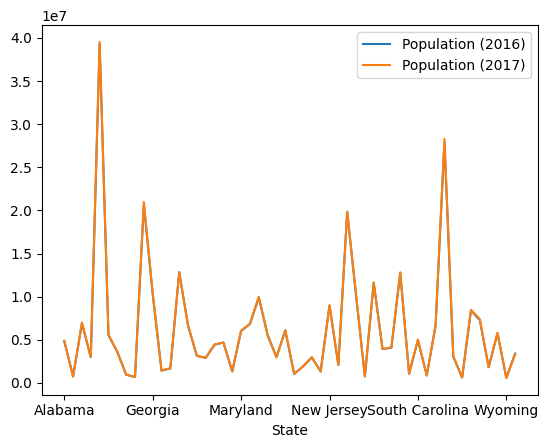

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
states = pd.read_csv('Data/states.csv', index_col=0)
states.plot()

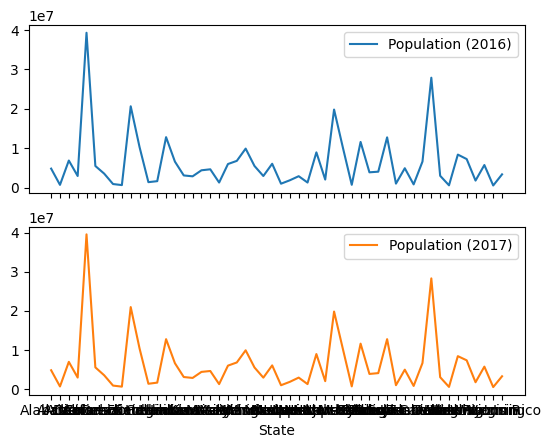

In [93]:
ax = states.plot(subplots=True, xticks=range(states.shape[0]))

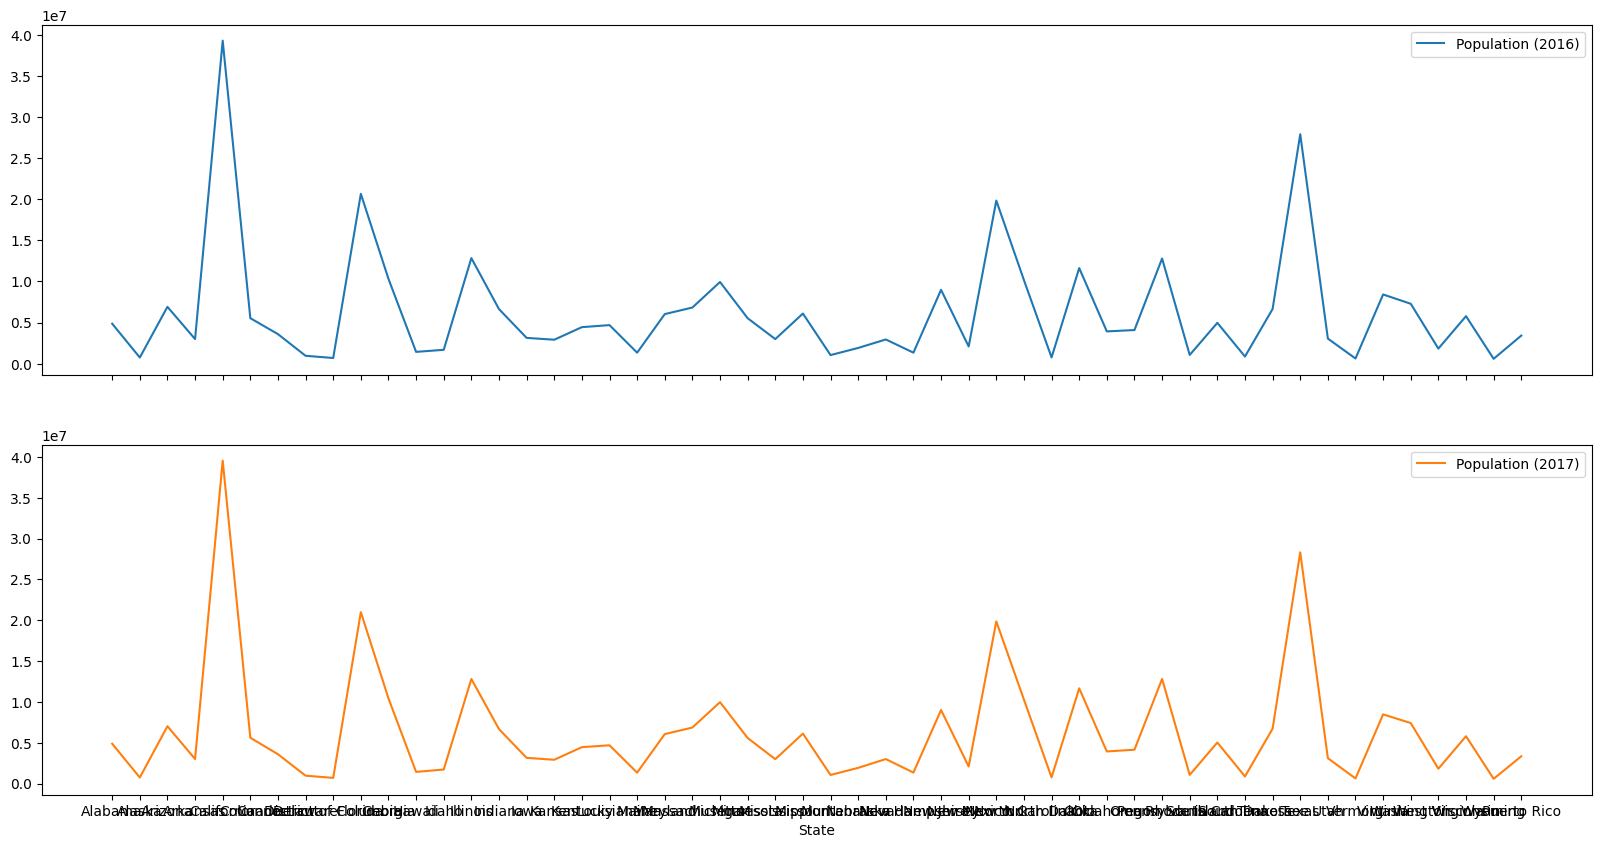

In [94]:
ax = states.plot(subplots=True, xticks=range(states.shape[0]), figsize=(20, 10))

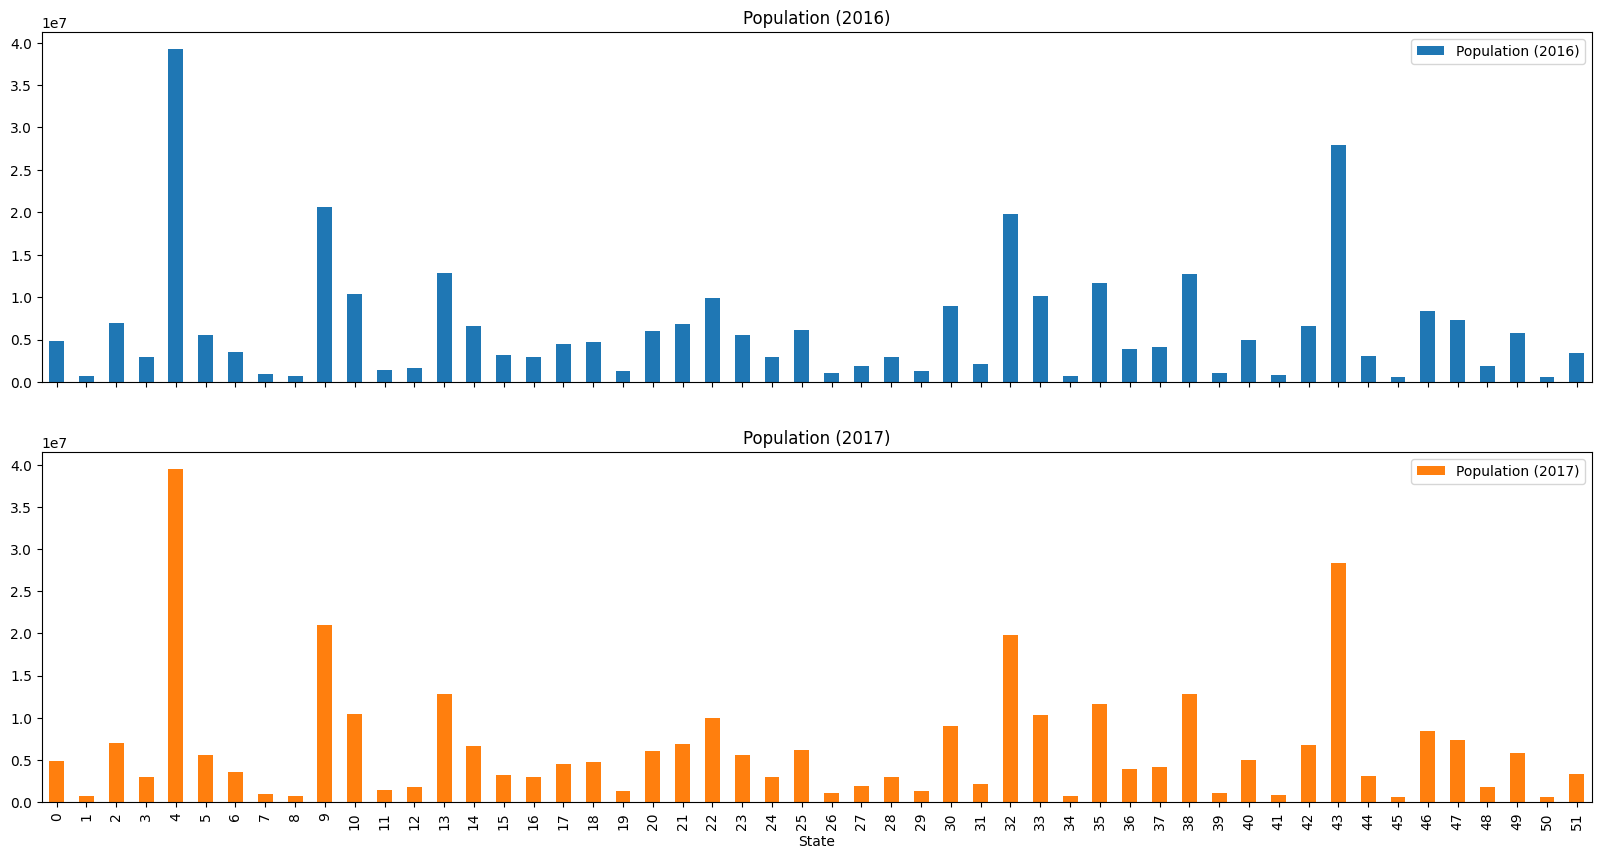

In [95]:
ax = states.plot(subplots=True, xticks=range(states.shape[0]), figsize=(20, 10), kind='bar')

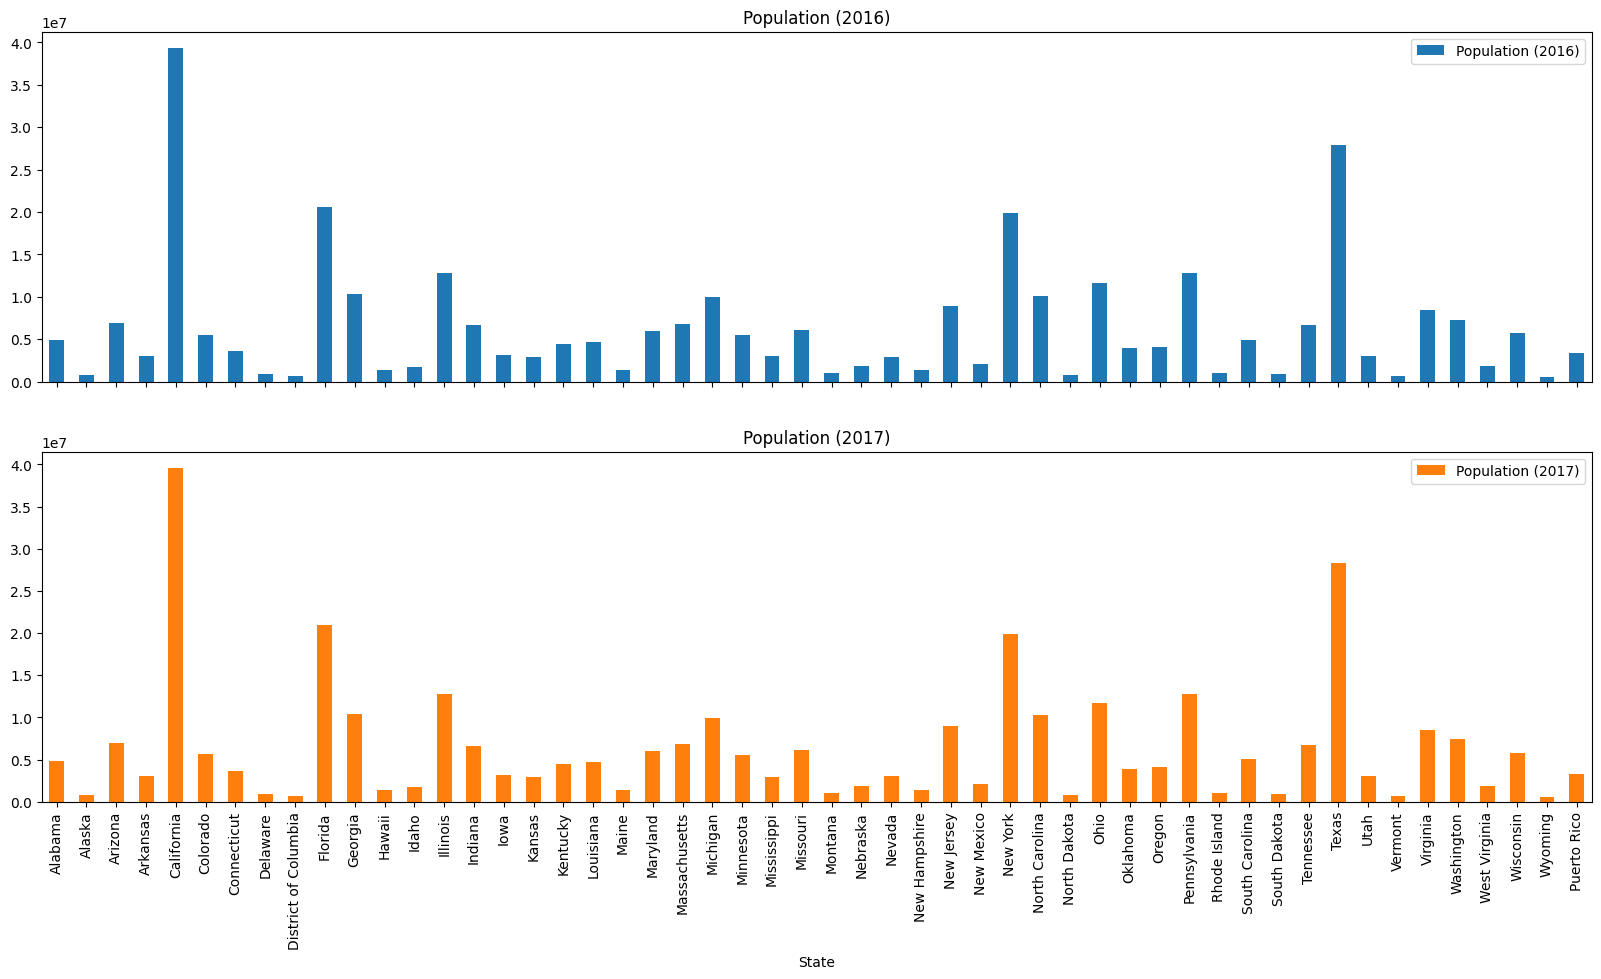

In [100]:
ax = states.plot(subplots=True, xticks=range(states.shape[0]), figsize=(20, 10), kind='bar')
_ = ax[1].set_xticklabels(list(states.index))

### 4.1 Apply + Lambda

In [108]:
states = pd.read_csv('Data/states.csv')

def to_set(name):
    return set(name.lower()).difference((' ',))

character_sets = states.State.apply(to_set)

In [106]:
character_sets

0                                   {b, l, m, a}
1                                   {l, k, a, s}
2                             {o, z, a, r, i, n}
3                                {k, a, r, s, n}
4                       {o, l, a, r, i, c, n, f}
5                             {d, o, l, a, r, c}
6                          {u, e, o, t, i, n, c}
7                             {d, w, e, l, a, r}
8     {d, f, u, b, o, t, i,  , l, m, a, r, s, c}
9                          {d, o, l, a, r, i, f}
10                            {e, o, a, r, i, g}
11                                  {h, w, a, i}
12                               {d, o, h, a, i}
13                               {o, i, l, s, n}
14                                  {d, n, a, i}
15                                  {w, o, a, i}
16                                  {s, n, a, k}
17                         {u, e, k, t, y, n, c}
18                         {u, o, s, l, a, i, n}
19                               {e, m, a, i, n}
20                  

In [109]:
characters = set()
for character_set in character_sets:
    characters.update(character_set)

characters

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

No state has a "q" in its name.